In [1]:
print("Hello")

Hello


In [2]:
import sys
!{sys.executable} -m pip install numpy==1.18

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!{sys.executable} -m pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [4]:
!{sys.executable} -m pip install scipy==1.1.0
!{sys.executable} -m pip install install scikit-learn==0.21.3
#!{sys.executable} -m pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


1 : 395.517 seconds
acceleration 1.000 	 efficiency: 1.000
2 : 198.994 seconds
acceleration 1.988 	 efficiency: 0.994
3 : 132.477 seconds
acceleration 2.986 	 efficiency: 0.995
4 : 102.738 seconds
acceleration 3.850 	 efficiency: 0.962
5 : 84.251 seconds
acceleration 4.695 	 efficiency: 0.939
6 : 73.937 seconds
acceleration 5.349 	 efficiency: 0.892
7 : 62.606 seconds
acceleration 6.318 	 efficiency: 0.903
8 : 54.843 seconds
acceleration 7.212 	 efficiency: 0.901
9 : 49.888 seconds
acceleration 7.928 	 efficiency: 0.881
10 : 44.939 seconds
acceleration 8.801 	 efficiency: 0.880
11 : 42.078 seconds
acceleration 9.400 	 efficiency: 0.855
12 : 39.515 seconds
acceleration 10.009 	 efficiency: 0.834
13 : 39.451 seconds
acceleration 10.026 	 efficiency: 0.771
14 : 39.706 seconds
acceleration 9.961 	 efficiency: 0.712
15 : 39.939 seconds
acceleration 9.903 	 efficiency: 0.660
16 : 39.937 seconds
acceleration 9.903 	 efficiency: 0.619
17 : 39.999 seconds
acceleration 9.888 	 efficiency: 0.582


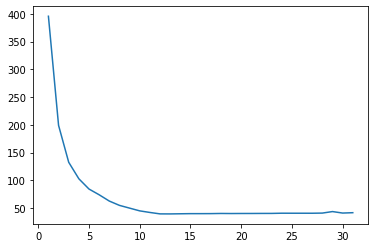

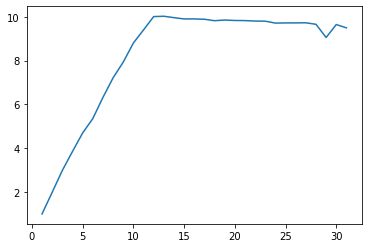

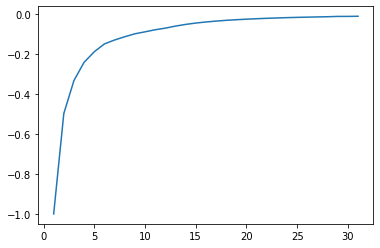

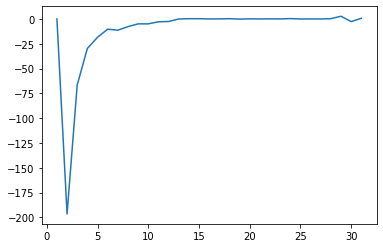

In [5]:
from time import time
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
STEP = 1
# define dataset
X, y = make_classification(n_samples=80000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
n_threads = [x for x in range(1, 32, STEP)]
first_time = 0
results = []
accelerations = []
velocities = []
d_results = [0.0]
for x in n_threads:
    # define the model
    model = RandomForestClassifier(n_estimators=500, n_jobs=x)
    # record current time
    start = time()
    # fit the model
    model.fit(X, y)
    # record current time
    end = time()
    # report execution time
    result = end - start
    if x == 1:
        first_time = result
    print('%d : %.3f seconds' % (x, result))
    print('acceleration %.3f \t efficiency: %.3f' % ((first_time/result), (first_time/(result * x))))
    results.append(result)
    accelerations.append(first_time/result)
    velocities.append(-first_time/(result * x * x))
    if x != 1:
        d_results.append((result - results[x-2])/STEP)

pyplot.plot(n_threads, results)
pyplot.show()

pyplot.plot(n_threads, accelerations)
pyplot.show()

pyplot.plot(n_threads, velocities)
pyplot.show()

pyplot.plot(n_threads, d_results)
pyplot.show()

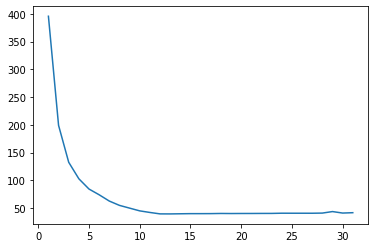

In [6]:
pyplot.plot(n_threads, results)
pyplot.show()

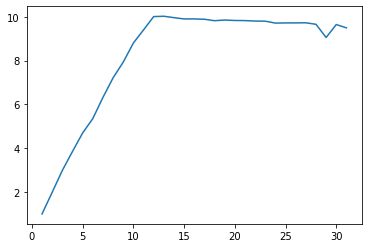

In [7]:
pyplot.plot(n_threads, accelerations)
pyplot.show()

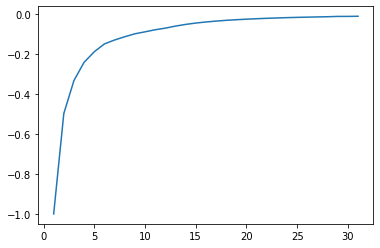

In [8]:
pyplot.plot(n_threads, velocities)
pyplot.show()

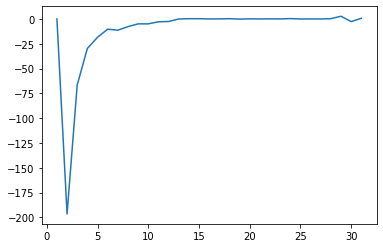

In [9]:
pyplot.plot(n_threads, d_results)
pyplot.show()